In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Generación de df.

Generales = 'J:/Mi unidad/Experimento/Plantillas finales/Generales.xlsx'
Ballotage = 'J:/Mi unidad/Experimento/Plantillas finales/Ballotage.xlsx'

df = pd.read_excel(Ballotage)

In [19]:
# Variables a analizar.

Variables = [
"ip_item_3_tiempo",
"ip_item_4_tiempo",
"ip_item_5_tiempo",
"ip_item_6_tiempo",
"ip_item_7_tiempo",
"ip_item_8_tiempo",
"ip_item_9_tiempo",
"ip_item_10_tiempo",
"ip_item_11_tiempo",
"ip_item_16_tiempo",
"ip_item_19_tiempo",
"ip_item_20_tiempo",
"ip_item_22_tiempo",
"ip_item_23_tiempo",
"ip_item_24_tiempo",
"ip_item_25_tiempo",
"ip_item_27_tiempo",
"ip_item_28_tiempo",
"ip_item_29_tiempo",
"ip_item_30_tiempo",
"IP_item3_Der_tiempo",
"IP_item3_Izq_tiempo",
"IP_item4_Der_tiempo",
"IP_item4_Izq_tiempo",
"IP_item5_Der_tiempo",
"IP_item5_Izq_tiempo",
"IP_item6_Der_tiempo",
"IP_item6_Izq_tiempo",
"IP_item7_Der_tiempo",
"IP_item7_Izq_tiempo",
"IP_item8_Der_tiempo",
"IP_item8_Izq_tiempo",
"IP_item9_Der_tiempo",
"IP_item9_Izq_tiempo",
"IP_item10_Der_tiempo",
"IP_item10_Izq_tiempo",
"IP_item11_Der_tiempo",
"IP_item11_Izq_tiempo",
"IP_item16_Der_tiempo",
"IP_item16_Izq_tiempo",
"IP_item19_Der_tiempo",
"IP_item19_Izq_tiempo",
"IP_item20_Der_tiempo",
"IP_item20_Izq_tiempo",
"IP_item22_Der_tiempo",
"IP_item22_Izq_tiempo",
"IP_item23_Der_tiempo",
"IP_item23_Izq_tiempo",
"IP_item24_Der_tiempo",
"IP_item24_Izq_tiempo",
"IP_item25_Der_tiempo",
"IP_item25_Izq_tiempo",
"IP_item27_Der_tiempo",
"IP_item27_Izq_tiempo",
"IP_item28_Der_tiempo",
"IP_item28_Izq_tiempo",
"IP_item29_Der_tiempo",
"IP_item29_Izq_tiempo",
"IP_item30_Der_tiempo",
"IP_item30_Izq_tiempo",
]

In [20]:
# Juntar todos los datos en un array.

Datos_Totales_Crudos = df[Variables].values.flatten()  # 'flatten()' convierte una matriz 2D en una 1D: nos queda una matriz de 1 fila.

In [21]:
# Eliminar los NaN.

Datos_Totales = Datos_Totales_Crudos[~np.isnan(Datos_Totales_Crudos)]

In [22]:
# Media de todos los elementos de las variables.

Promedio = np.mean(Datos_Totales)

In [23]:
# Desvío estándar de todos los elementos de las variables.

Desvio_Estandar = np.std(Datos_Totales)

print("Promedio general de todas las variables:", Promedio)
print("Desvío estándar general de todas las variables:", Desvio_Estandar)

Promedio general de todas las variables: 11.527597189457413
Desvío estándar general de todas las variables: 118.55096871554159


In [24]:
# Límites superiores e inferiores de datos aceptados (con 2 y 3 desvíos estándar).

Lim_Sup_2D = Promedio + (2 * Desvio_Estandar)
Lim_Inf_2D = Promedio - (2 * Desvio_Estandar)

Lim_Sup_3D = Promedio + (3 * Desvio_Estandar)
Lim_Inf_3D = Promedio - (3 * Desvio_Estandar)



In [25]:
# Valores por fuera.

Valores_Fuera_2D = Datos_Totales[(Datos_Totales > Lim_Sup_2D) | (Datos_Totales < Lim_Inf_2D)]
Valores_Fuera_3D = Datos_Totales[(Datos_Totales > Lim_Sup_3D) | (Datos_Totales < Lim_Inf_3D)]

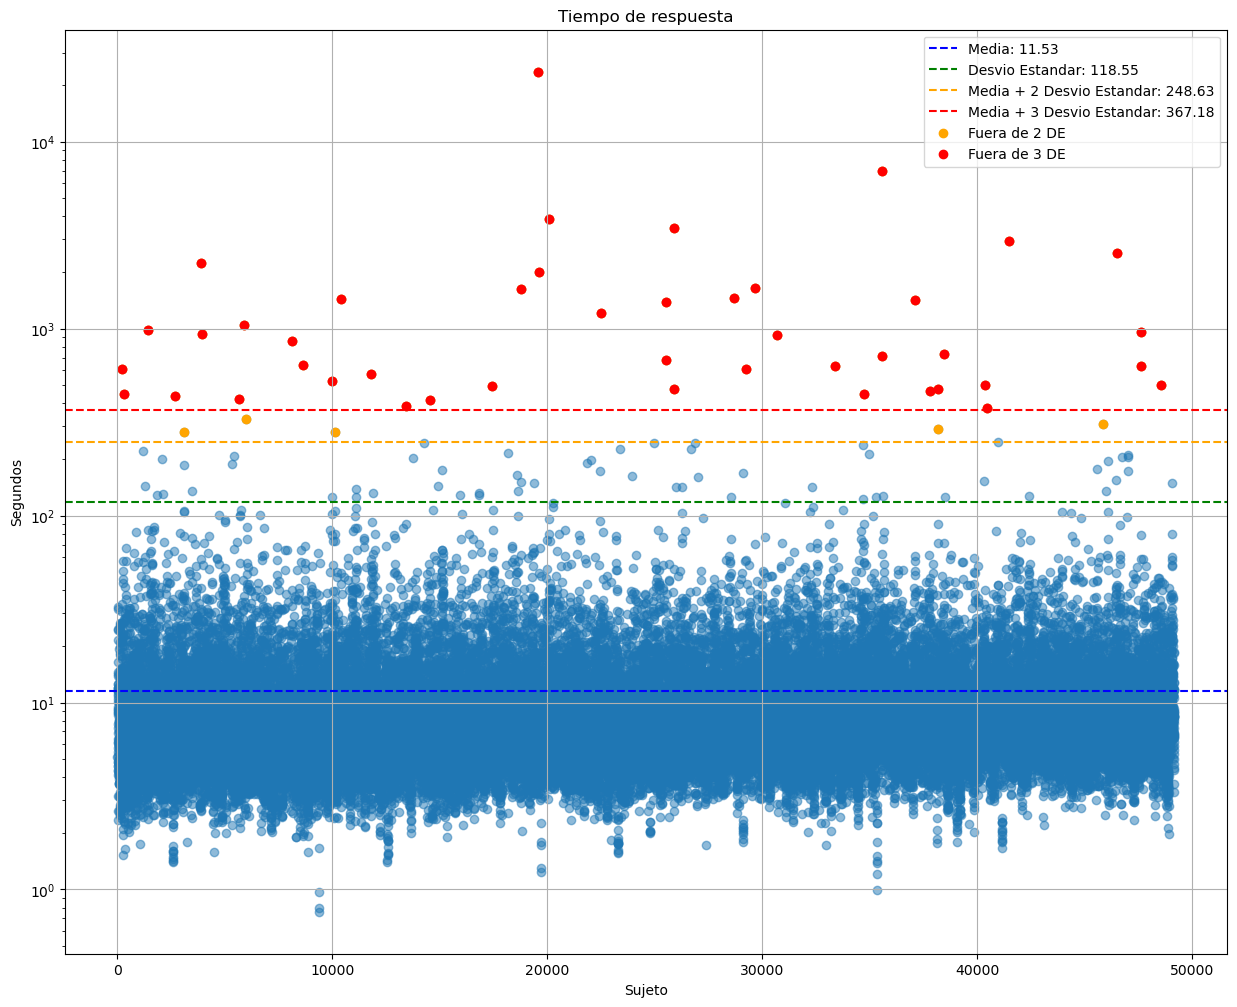

In [26]:
# Gráfico.

# Figura.
plt.figure(figsize=(15, 12))

# Variables: la frecuencia y los datos.
plt.scatter(range(len(Datos_Totales)), Datos_Totales, alpha=0.5)

# Título y ejes.
plt.title("Tiempo de respuesta")
plt.xlabel("Sujeto")
plt.ylabel("Segundos")

# Escala logarítmica en el eje y (vertical).
plt.yscale('log')

# Línea de tendencia.
plt.axhline(Promedio, color='b', linestyle='--', label=f'Media: {Promedio:.2f}')

# Línea de desvío.
plt.axhline(Desvio_Estandar, color='g', linestyle='--', label=f'Desvio Estandar: {Desvio_Estandar:.2f}')

# Línea de 2 desvíos.
plt.axhline(Lim_Sup_2D, color='orange', linestyle='--', label=f'Media + 2 Desvio Estandar: {Lim_Sup_2D:.2f}')

# Línea de 3 desvíos.
plt.axhline(Lim_Sup_3D, color='red', linestyle='--', label=f'Media + 3 Desvio Estandar: {Lim_Sup_3D:.2f}')

# Valores por fuera de 2 desvíos estándar.
plt.scatter(np.where((Datos_Totales > Lim_Sup_2D) | (Datos_Totales < Lim_Inf_2D))[0], 
            Valores_Fuera_2D, color='orange', label="Fuera de 2 DE")

# Valores por fuera de 3 desvíos estándar.
plt.scatter(np.where((Datos_Totales > Lim_Sup_3D) | (Datos_Totales < Lim_Inf_3D))[0], 
            Valores_Fuera_3D, color='red', label="Fuera de 3 DE")

# Leyenda en un cuadrito.
plt.legend()

# Cuadrícula.
plt.grid(True)

# Mostrar.
plt.show()

In [27]:
# Índices crudos de los valores que están por fuera de 2 y 3 desvíos estándar.

Indices_Fuera_Crudos_2D = np.where((Datos_Totales_Crudos > Lim_Sup_2D) | (Datos_Totales_Crudos < Lim_Inf_2D))[0]
Indices_Fuera_Crudos_3D = np.where((Datos_Totales_Crudos > Lim_Sup_3D) | (Datos_Totales_Crudos < Lim_Inf_3D))[0]

In [28]:
# Dividir índices por cantidad de datos.

Divisor = 60

# Obtener el resto de la división de cada elemento de la lista por el divisor
Indices_Fuera_2D = [(i // Divisor) for i in Indices_Fuera_Crudos_2D]
Indices_Fuera_3D = [(i // Divisor) for i in Indices_Fuera_Crudos_3D]

In [29]:
# Obtener las filas correspondientes en el DataFrame original
Filas_Fuera_2D = df.iloc[Indices_Fuera_2D]
Filas_Fuera_3D = df.iloc[Indices_Fuera_3D]

# Obtener los valores de la columna 'ID' para las filas fuera de 2 y 3 desvíos estándar
ID_Fuera_2D = Filas_Fuera_2D['id']
ID_Fuera_3D = Filas_Fuera_3D['id']

In [33]:
print("Para 2 desvíos, se eliminaron", len(Filas_Fuera_2D), "sujetos, quedando", 1294-len(Filas_Fuera_2D), "en la base de datos")
print("Para 3 desvíos, se eliminaron", len(Filas_Fuera_3D), "sujetos, quedando", 1294-len(Filas_Fuera_3D), "en la base de datos")

Para 2 desvíos, se eliminaron 49 sujetos, quedando 1245 en la base de datos
Para 3 desvíos, se eliminaron 44 sujetos, quedando 1250 en la base de datos


In [31]:
# Eliminar las filas según los índices en Filas_Fuera_2D
df_sin_2D = df.drop(index=Indices_Fuera_2D)
df_sin_3D = df.drop(index=Indices_Fuera_3D)

In [32]:
# Guardar archivos.

# Especifica la ruta donde quieres guardar el archivo CSV
Ruta_2D = 'J:/Mi unidad/Experimento/Analisis/Datos filtrados (2 Desvios estándar).xlsx'
Ruta_3D = 'J:/Mi unidad/Experimento/Analisis/Datos filtrados (3 Desvios estándar).xlsx'

# Guardar
df_sin_2D.to_excel(Ruta_2D, index=False)
df_sin_3D.to_excel(Ruta_3D, index=False)